In [1]:
import pandas as pd

#### 'modeling_data.csv' 파일
- 'key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','time' 제거 ('dist' 계산 후에는 필요 없음)

In [2]:
sample_df = pd.read_csv('modeling_data.csv')
sample_df

,Unnamed: 0,fare_amount,passenger_count,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,4.5,1,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16.9,1,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,5.7,2,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,3,7.7,1,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,4,5.3,1,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5.7,5,2011-01-14,13:55:00,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,999996,10.5,1,2012-07-20,12:59:16,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,999997,6.5,1,2013-07-01,09:10:00,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,999998,17.5,3,2013-09-24,23:28:00,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


- 'log_date','log_time'도 제거

In [3]:
sample_df.drop(columns=['Unnamed: 0','log_date','log_time'], inplace=True)

In [4]:
sample_df.head()

,fare_amount,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,4.5,1,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,16.9,1,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,5.7,2,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,7.7,1,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,5.3,1,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592


In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   log_hour         1000000 non-null  int64  
 3   log_min          1000000 non-null  int64  
 4   log_year         1000000 non-null  int64  
 5   log_month        1000000 non-null  int64  
 6   log_day          1000000 non-null  int64  
 7   7to15            1000000 non-null  int64  
 8   16to19           1000000 non-null  int64  
 9   20to6            1000000 non-null  int64  
 10  dayofweek        1000000 non-null  int64  
 11  weekday          1000000 non-null  int64  
 12  is_extracharge   1000000 non-null  int64  
 13  taxi_amount      1000000 non-null  int64  
 14  dist             1000000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


=======================================================================================================================

#### train/test data 분할

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = sample_df.drop(columns=['fare_amount'])
y = sample_df['fare_amount']

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2,random_state=10)

In [8]:
print(x_train.shape, x_valid.shape)

(800000, 14) (200000, 14)


#### K-Fold 교차검증

In [9]:
from sklearn.model_selection import KFold

In [12]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)

=======================================================================================================================

### 1. XGBregressor

In [ ]:
# DMatrix 형태로 돌려야 함

In [10]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### 1-1. 모델링

In [15]:
model = XGBRegressor()

In [16]:
model.fit(x_train, y_train)
model

# objective='reg:linear' => 회귀트리

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### 1-2. 중요변수 시각화

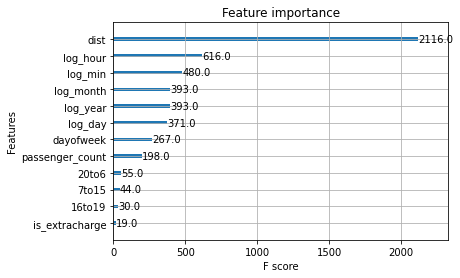

In [22]:
import matplotlib.pyplot as plt

plot_importance(model)

plt.show()

#### 1-3. 모델 평가 

In [17]:
y_pred = model.predict(x_valid)
y_true = y_valid

In [18]:
mae = mean_absolute_error(y_true, y_pred)
mae 

2.841833465608669

In [19]:
mse = mean_squared_error(y_true, y_pred)
mse

26.844044696898255

In [16]:
from math import sqrt

In [21]:
rmse = sqrt(mean_squared_error(y_valid, y_pred))
rmse

5.181123883569882

#### 1-4. 하이퍼파라미터 조정

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = XGBRegressor(
    
    learning_rate =0.1,
    
    max_depth=4
    
)

In [13]:
model.fit(x_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
y_pred = model.predict(x_valid)
y_true = y_valid

In [17]:
# 성능평가

rmse = sqrt(mean_squared_error(y_valid, y_pred))
rmse

5.175811485999042

=======================================================================================================================

### 2. fare_amount prediction

In [41]:
test_df = pd.read_csv('test3.csv')
test_df

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24,2015-01-27,...,1,27,1,0,0,2,1,0,1,1094.593298
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24,2015-01-27,...,1,27,1,0,0,2,1,0,1,1474.196242
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44,2011-10-08,...,10,8,1,0,0,6,0,0,1,357.075676
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12,2012-12-01,...,12,1,0,0,1,6,0,1,1,1150.115807
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12,2012-12-01,...,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2015-05-10 12:37:51,2015-05-10,...,5,10,1,0,0,7,0,0,2,1484.303484
9910,9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,2015-01-12 17:05:51,2015-01-12,...,1,12,0,1,0,1,1,1,2,1843.581309
9911,9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,2015-04-19 20:44:15,2015-04-19,...,4,19,0,0,1,7,0,1,2,22663.426643
9912,9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,2015-01-31 01:05:19,2015-01-31,...,1,31,0,0,1,6,0,1,2,5567.288310


In [42]:
test_df.drop(columns=['Unnamed: 0','key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','time', 'log_date','log_time'], inplace=True)

In [43]:
test_df.head()

,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386


In [44]:
y_pred = model.predict(test_df)
y_pred

array([ 8.565637 ,  9.522258 ,  5.3433175, ..., 55.33065  , 20.333149 ,
        8.839909 ], dtype=float32)

In [45]:
test_df = pd.read_csv('test3.csv')

In [46]:
test_df['fare_amount'] = y_pred

In [47]:
test_df = test_df[['key', 'fare_amount']]

In [48]:
test_df = test_df.set_index(['key'])

In [49]:
test_df

,fare_amount
key,
2015-01-27 13:08:24.0000002,8.565637
2015-01-27 13:08:24.0000003,9.522258
2011-10-08 11:53:44.0000002,5.343318
2012-12-01 21:12:12.0000002,8.166399
2012-12-01 21:12:12.0000003,12.632651
...,...
2015-05-10 12:37:51.0000002,9.311222
2015-01-12 17:05:51.0000001,10.282963
2015-04-19 20:44:15.0000001,55.330650


#### 'submission.csv' 파일로 저장

In [50]:
test_df.to_csv("submission.csv")